In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

!pip install IPython
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number5')

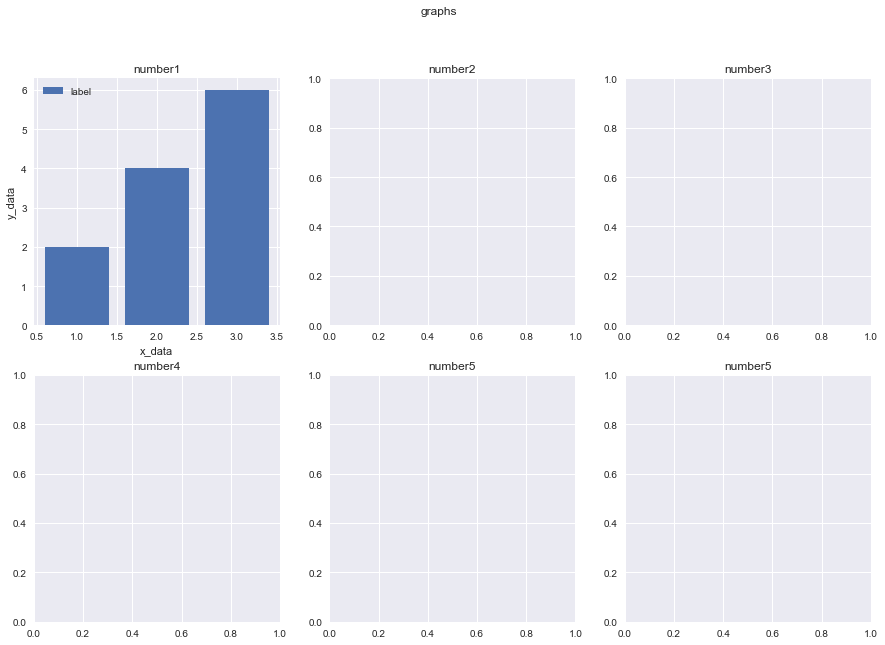

<Figure size 432x288 with 0 Axes>

In [6]:
x=[1,2,3]
y=[2,4,6]

fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.suptitle('graphs')

#plt.subplots(m,n,i) m행 n열 i번쩨

ax[0,0].bar(x,y,label='label')
ax[0,0].set_title('number1')
ax[0,0].legend()
fig = plt.figure()
ax[0,0].set(xlabel='x_data',ylabel='y_data')

ax[0,1].set_title('number2')

ax[0,2].set_title('number3')
ax[1,0].set_title('number4')
ax[1,1].set_title('number5')
ax[1,2].set_title('number5')

<Figure size 432x288 with 0 Axes>

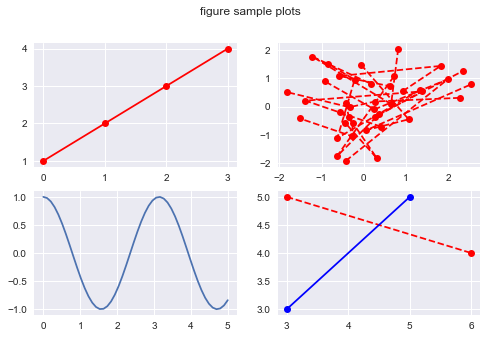

In [7]:
warnings.filterwarnings('ignore')

fig = plt.figure()

fig,ax_lst=plt.subplots(2,2,figsize=(8,5))

fig.suptitle('figure sample plots')

ax_lst[0][0].plot([1,2,3,4],"ro-")
ax_lst[0][1].plot(np.random.randn(4,10),np.random.randn(4,10),"ro--")
ax_lst[1][0].plot(np.linspace(0,5),np.cos(2*np.linspace(0,5)))
ax_lst[1][1].plot([3,6],[5,4],'ro--')
ax_lst[1][1].plot([3,5],[3,5],'bo-')

In [8]:
parameters= {
    'axes.titlesize':25,
    'axes.labelsize':20,
    'ytick.labelsize':20
    
}
plt.rcParams.update(parameters)

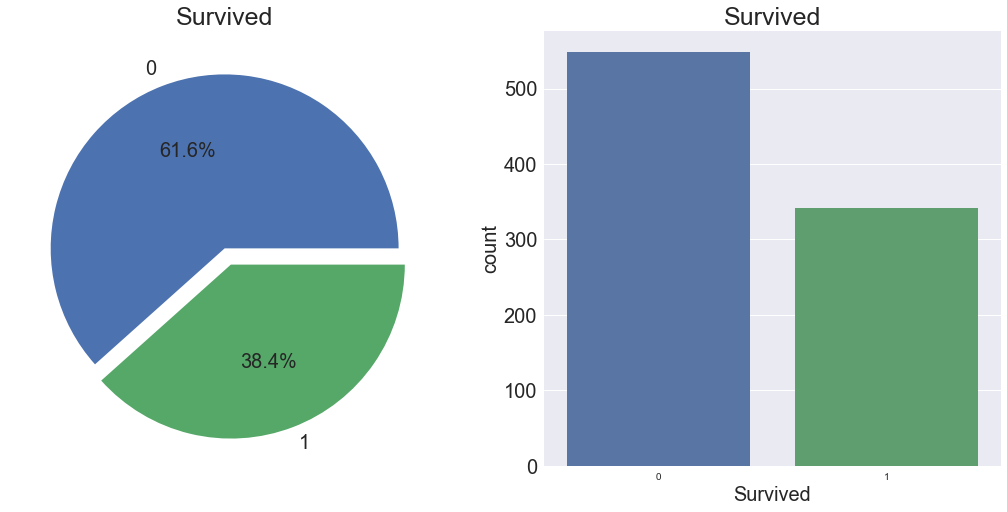

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],autopct="%1.1f%%",fontsize=20)
ax[0].set_ylabel('')
ax[0].set_title('Survived')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

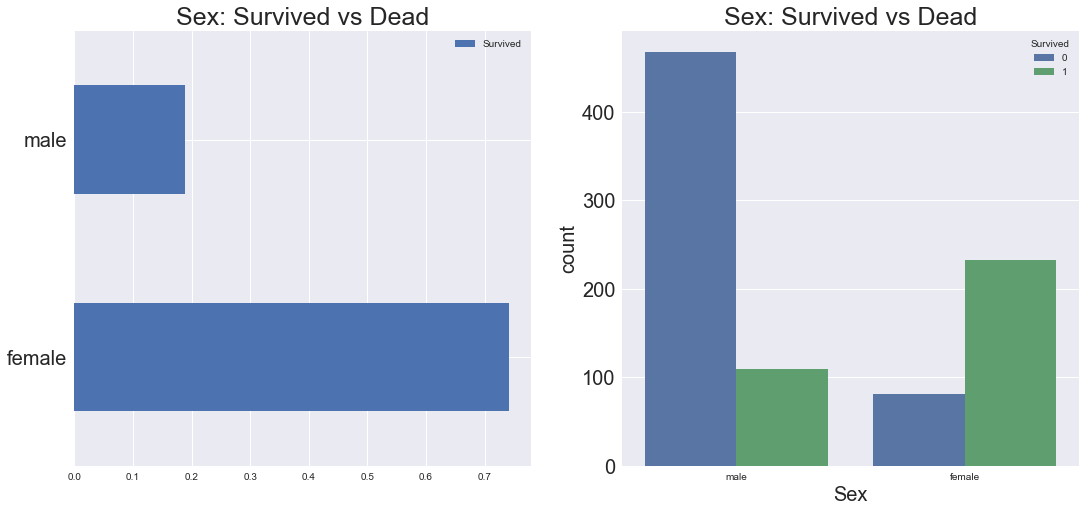

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Sex: Survived vs Dead')

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap="winter_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


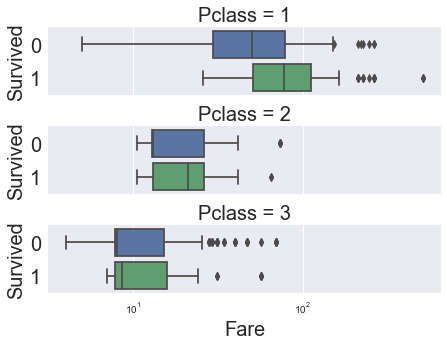

In [13]:
plot = sns.catplot(x="Fare",y='Survived',row='Pclass',kind='box',orient='h',height=1.5,aspect=4,data=data.query("Fare>0"))
plot.set(xscale="log")

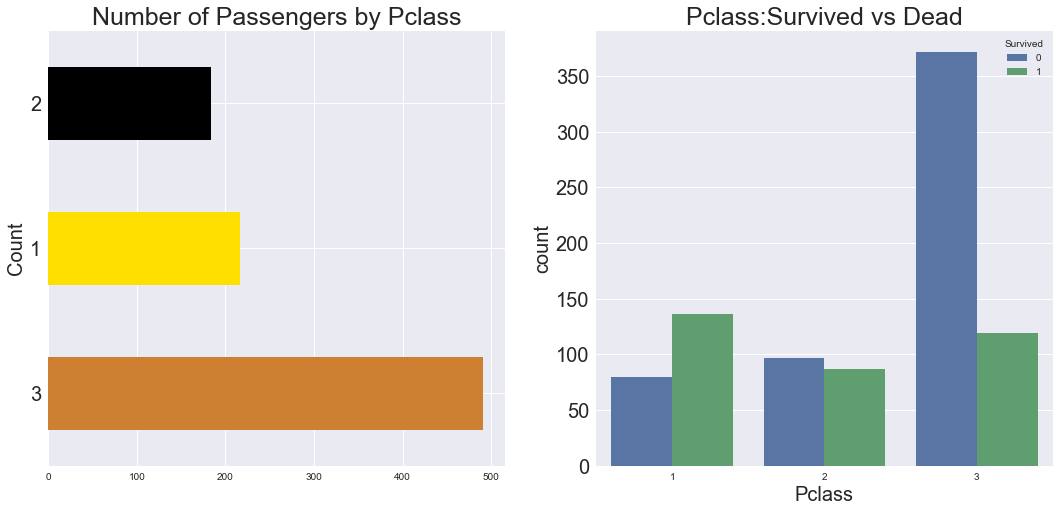

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.barh(ax=ax[0], color=['#CD7F32', '#FFDF00', '#000000'])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

In [15]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

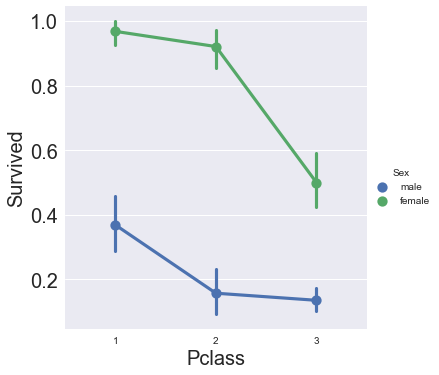

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

In [17]:
print('Oldest passenger was',data['Age'].max())
print('Youngest passenger was',data['Age'].min())
print('Average Age was',data['Age'].mean())

Oldest passenger was 80.0
Youngest passenger was 0.42
Average Age was 29.69911764705882


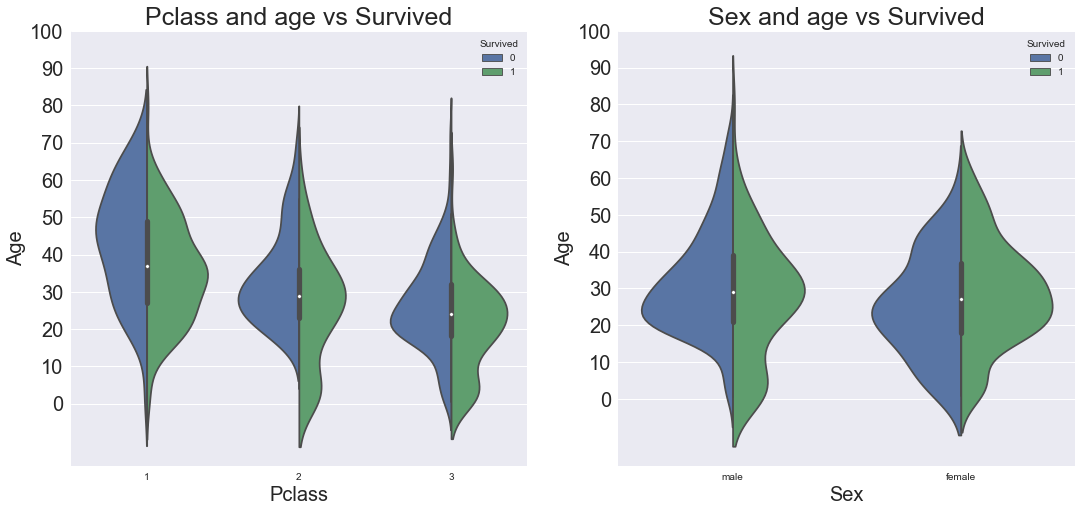

In [18]:
f,ax = plt.subplots(1,2,figsize =(18,8))

sns.violinplot('Pclass','Age',hue='Survived',data=data,ax=ax[0],split=True)
ax[0].set_title('Pclass and age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=data,ax=ax[1],split=True)
ax[1].set_yticks(range(0,110,10))
ax[1].set_title('Sex and age vs Survived')

plt.show()




In [19]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
#str.extract('([정규표현식])') <- 바로 이 위치에 추출하고 싶은 문자열의 정규표현식을  대입
#.(dot)을 기준으로 A-Z 또는 a-z 사이의 문자열을 추출합니다.

In [20]:
data[['Name','Initial']]

,Name,Initial
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [21]:
pd.crosstab(data.Sex,data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [25]:
#age 의 결측값<-initial의 mean으로 넣어줌
#idx= data[data.Age.isnull() & data.Initial=='Mr'].index
#data.loc[idx]=round(data.loc[data['Initial']=='Mr','Age'].mean(),0)
#data.loc[(data.Age.isnull() & data.Initial=='Mrs'),'Age']=round(data.loc[data['Initial']=='Mrs','Age'].mean(),0)
#data.loc[(data.Age.isnull() & data.Initial=='Master'),'Age']=round(data.loc[data['Initial']=='Master','Age'].mean(),0)
#data.loc[(data.Age.isnull() & data.Initial=='Miss'),'Age']=round(data.loc[data['Initial']=='Miss','Age'].mean(),0)
#data.loc[(data.Age.isnull() & data.Initial=='Other'),'Age']=int(round(data.loc[data['Initial']=='Other','Age'].mean(),0))

data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [26]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

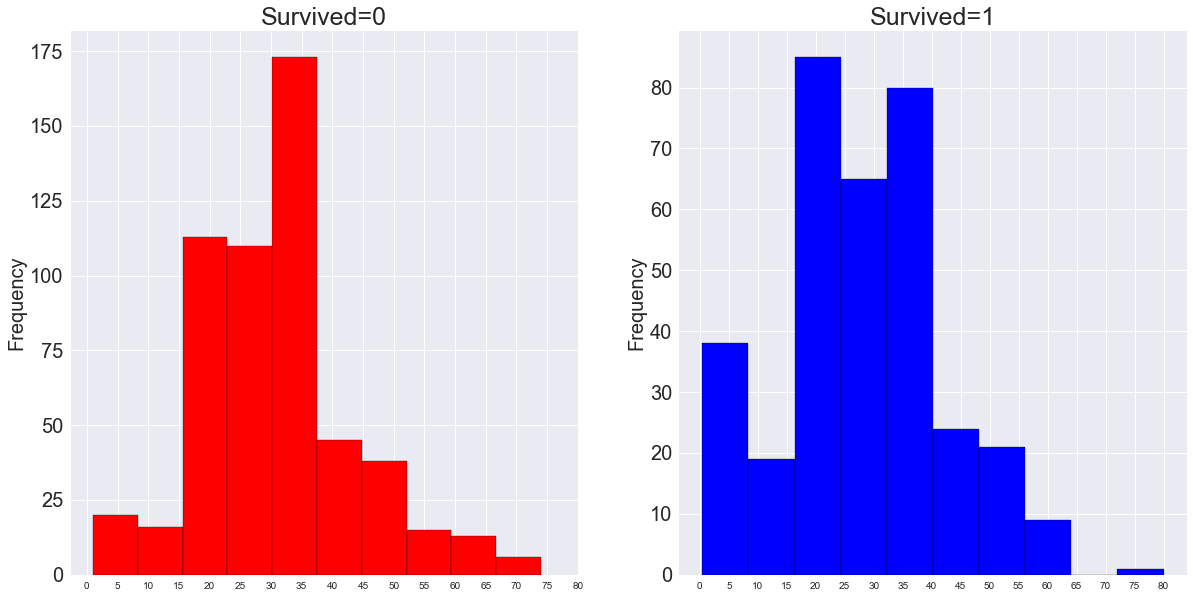

In [27]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],edgecolor='black',color='red')
ax[0].set_title('Survived=0')
ax[0].set_xticks(list(range(0,85,5)))

data[data['Survived']==1].Age.plot.hist(ax=ax[1],edgecolor='black',color='blue')
ax[1].set_title('Survived=1')
ax[1].set_xticks(list(range(0,85,5)))


plt.show()

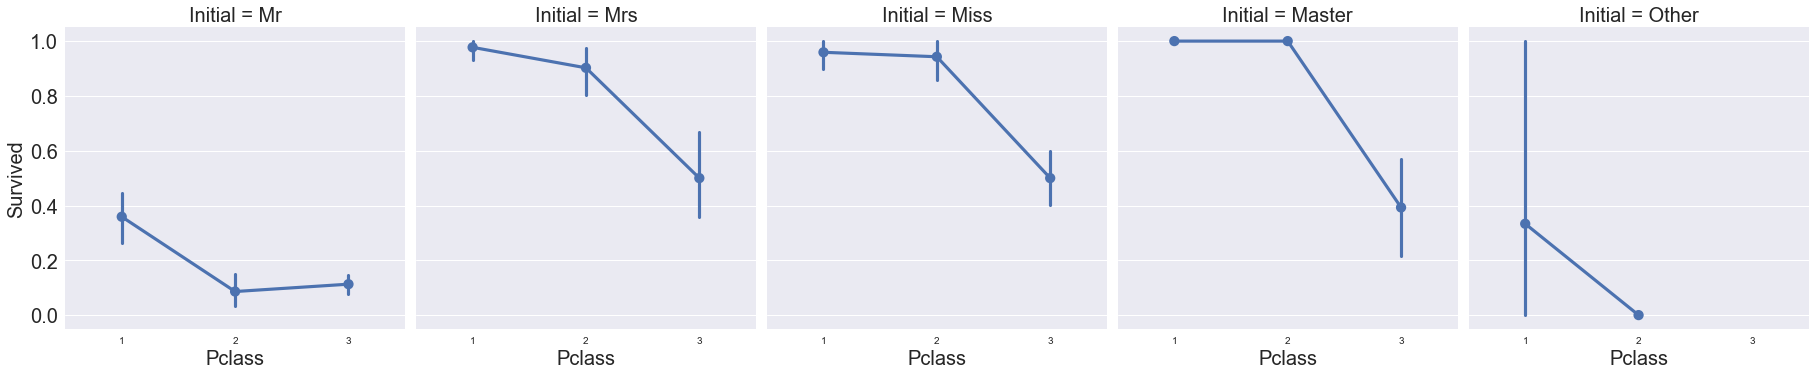

In [28]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [29]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

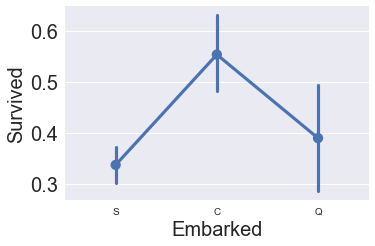

In [30]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() #현재 그래프에 대하여
fig.set_size_inches(5,3)
plt.show()

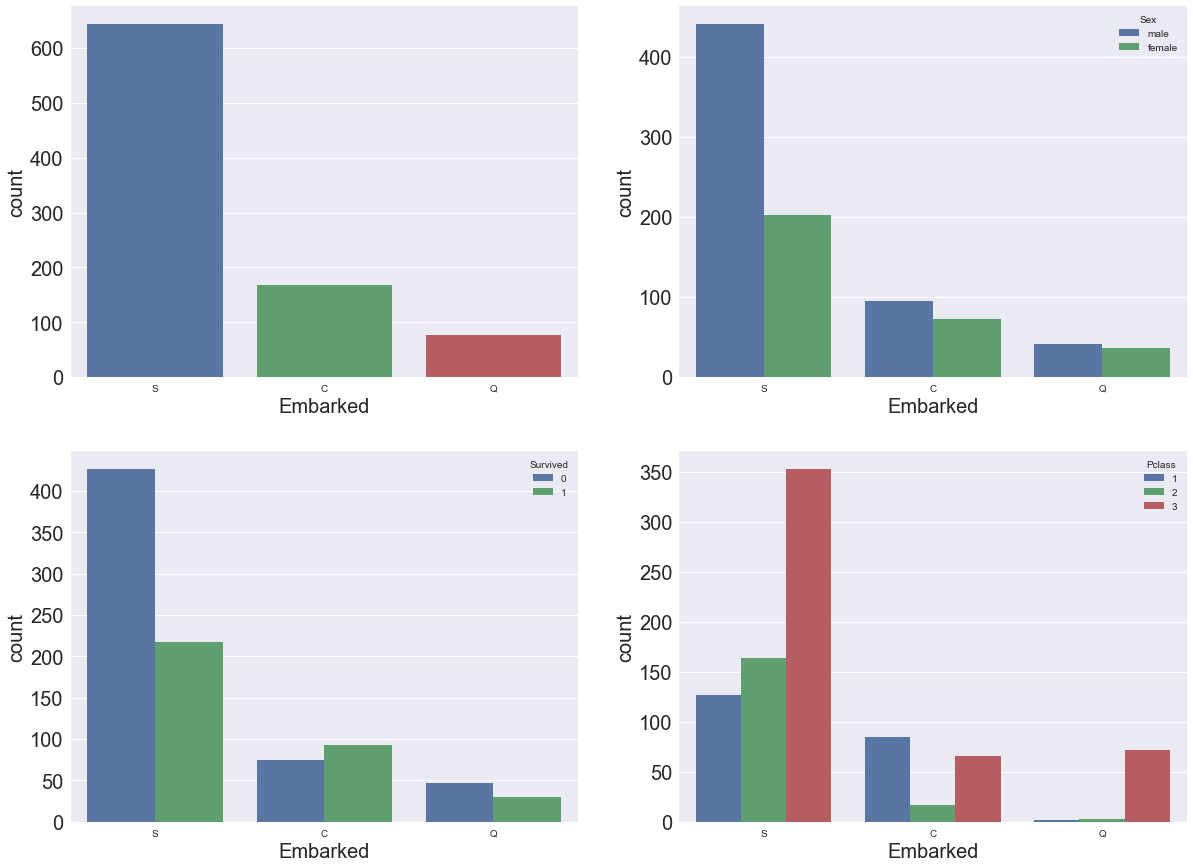

In [31]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])

plt.show()


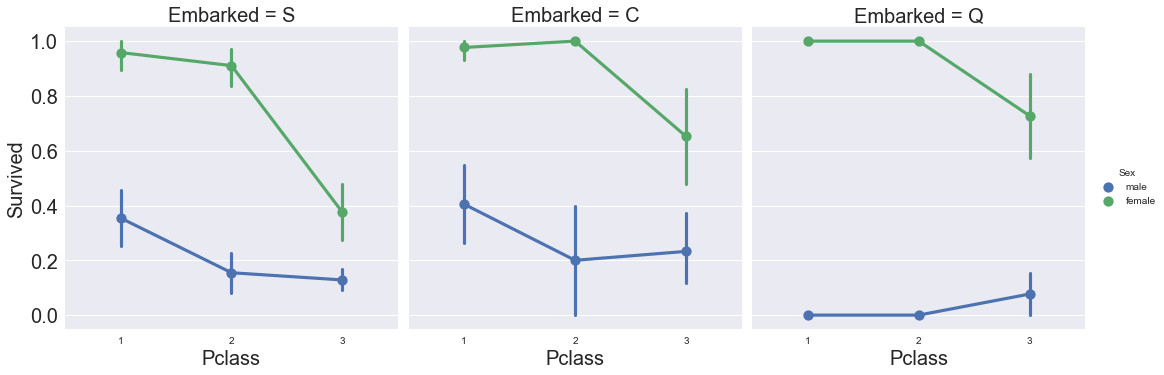

In [32]:
sns.factorplot('Pclass','Survived',hue="Sex",col='Embarked',data=data)
plt.show()

In [33]:
data['Embarked'].fillna('S',inplace=True)

In [34]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Initial        False
dtype: bool

In [35]:
pd.crosstab([data.SibSp],data.Survived,margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


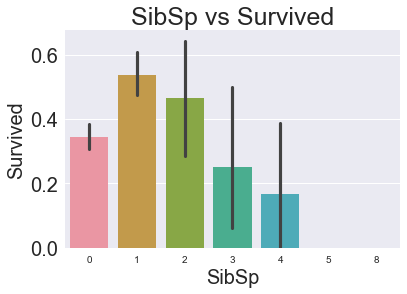

In [36]:
sns.barplot('SibSp','Survived',data=data)
plt.title('SibSp vs Survived')
plt.show()

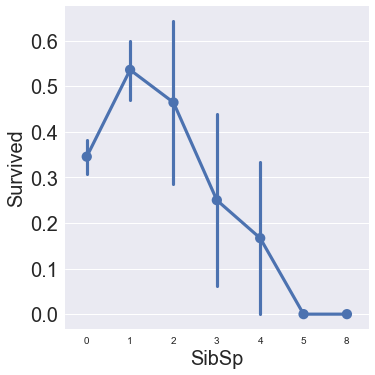

In [37]:
sns.factorplot('SibSp','Survived',data=data)
plt.show()

In [38]:
pd.crosstab(data.SibSp,data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [39]:
pd.crosstab(data.Parch,data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


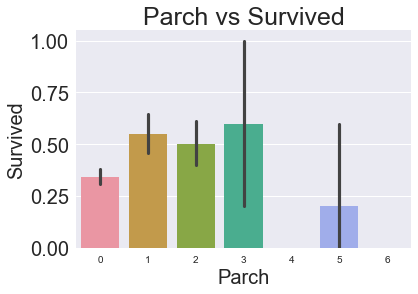

In [40]:
sns.barplot('Parch','Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

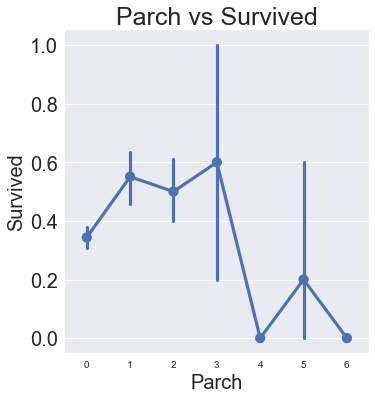

In [41]:
sns.factorplot('Parch','Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

In [42]:
print('Highest Fare',data['Fare'].max())
print('Lowest Fare',data['Fare'].min())
print('Average Fare',data['Fare'].mean())

Highest Fare 512.3292
Lowest Fare 0.0
Average Fare 32.2042079685746


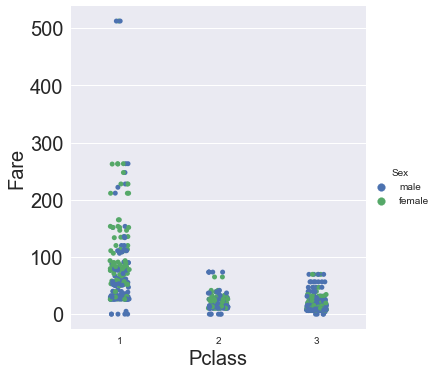

In [43]:
sns.catplot(x='Pclass',y='Fare',hue='Sex',data=data)
plt.show()

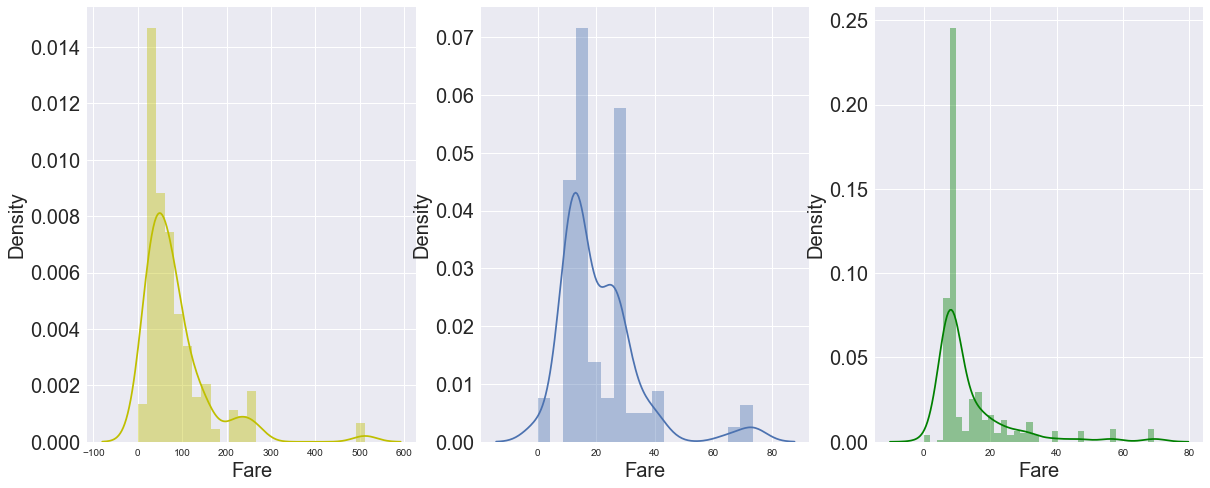

In [44]:
f,ax= plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0],color='y')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2],color='g')

plt.show()

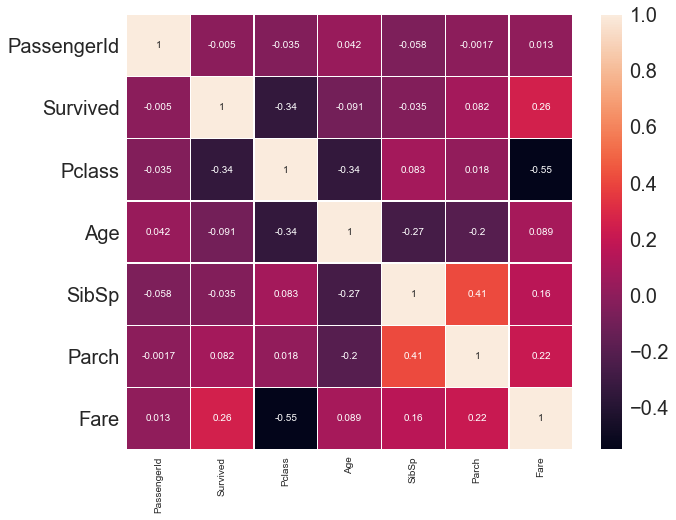

In [45]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [46]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [47]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


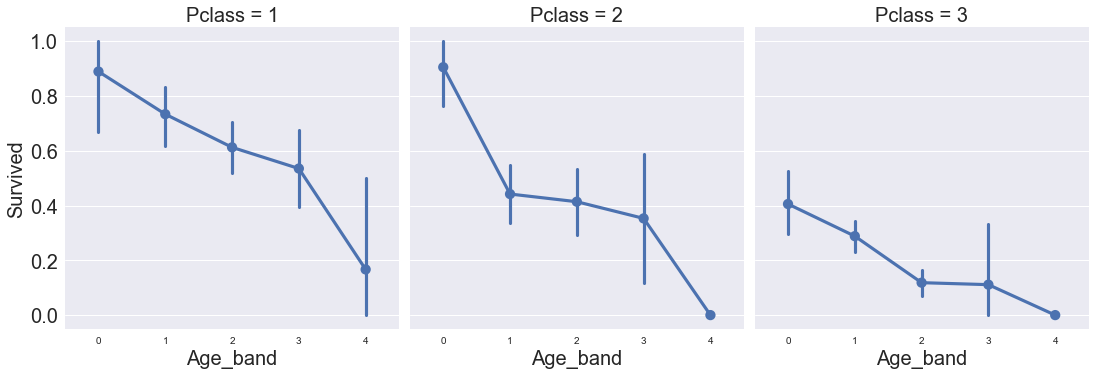

In [49]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

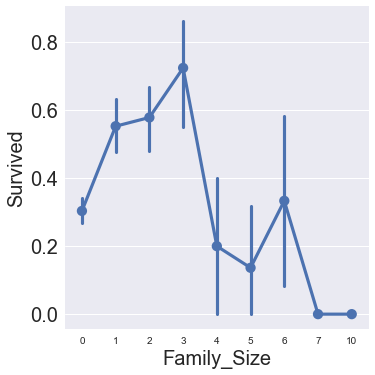

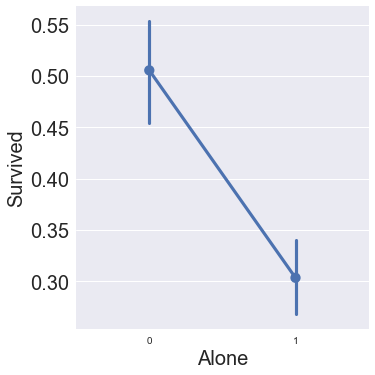

In [58]:
#f,ax= plt.subplots(1,2,figsize=(18,8))

data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  #family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  #Alone


sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])

sns.factorplot('Alone','Survived',data=data,ax=ax[1])

plt.show()

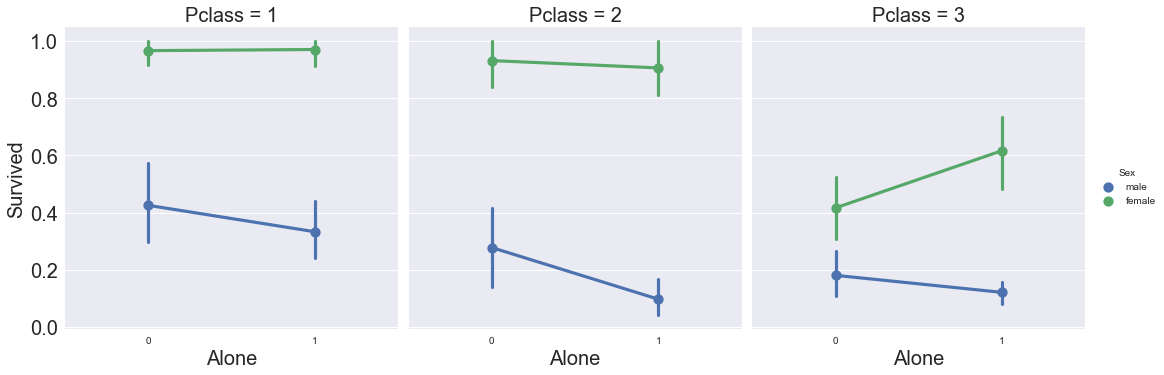

In [61]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [62]:
data['Fare_range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame()

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [66]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31) & (data['Fare']<513),'Fare_cat']=3


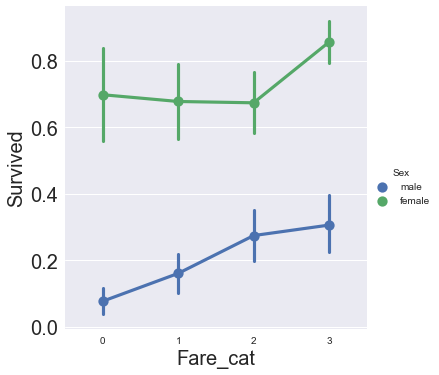

In [67]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [68]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0, 1, 2, 3, 4],inplace=True)

In [69]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_range', 'Fare_cat'],
      dtype='object')

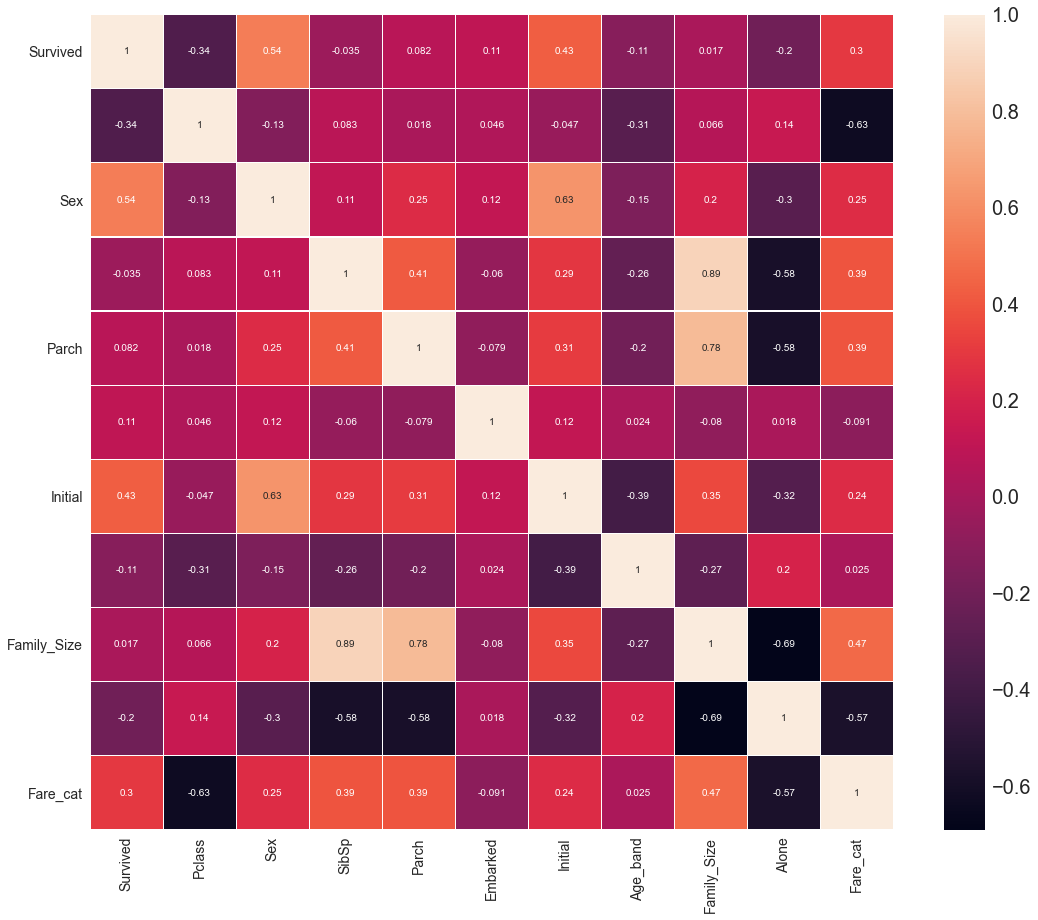

In [71]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range', 'PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [74]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0),columns=['A','B','C','D'],index=np.arange(0,100,10))
df

,A,B,C,D
0,-1.465015,-1.341651,-0.980306,0.163302
10,-0.972423,-1.119640,-1.368537,-0.378130
20,-2.381215,-0.786415,0.257575,1.405098
30,-2.440040,-1.202993,-0.004316,1.382609
40,-2.128942,-0.549014,-1.142997,1.041799
50,-2.302291,-0.596789,1.558476,1.029428
60,-1.422578,-1.100745,1.567234,0.934910
70,-0.897035,-0.448201,0.770458,0.854936
80,-1.911247,-1.631113,4.210429,-0.348478
90,-1.615805,-2.987946,5.657960,-0.498408


<AxesSubplot:>

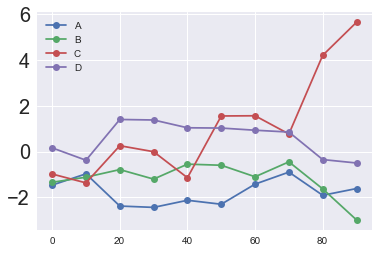

In [76]:
df.plot(marker='o')

In [78]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


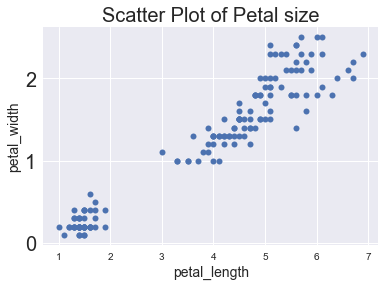

In [79]:
plt.plot('petal_length','petal_width',data=iris,linestyle='none',marker='o',markersize=6)
plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

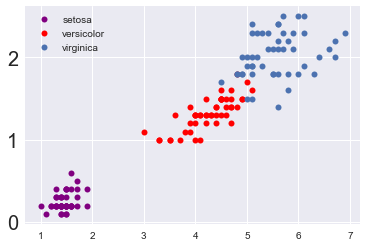

In [83]:
plt.plot('petal_length','petal_width',data=iris[iris['species']=="setosa"],color='purple',linestyle='none',marker='o',markersize=6)
plt.plot('petal_length','petal_width',data=iris[iris['species']=="versicolor"],color='red',linestyle='none',marker='o',markersize=6)
plt.plot('petal_length','petal_width',data=iris[iris['species']=="virginica"],linestyle='none',marker='o',markersize=6)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

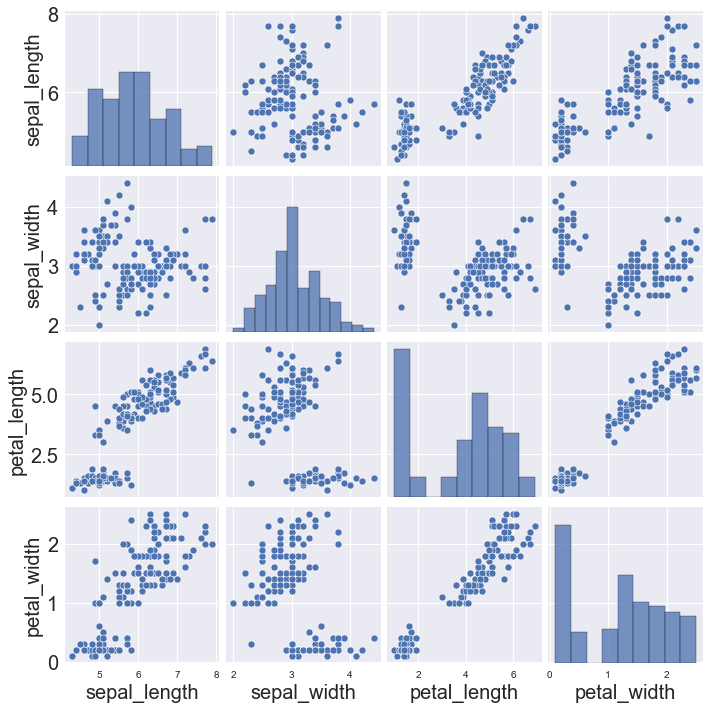

In [84]:
sns.pairplot(iris)

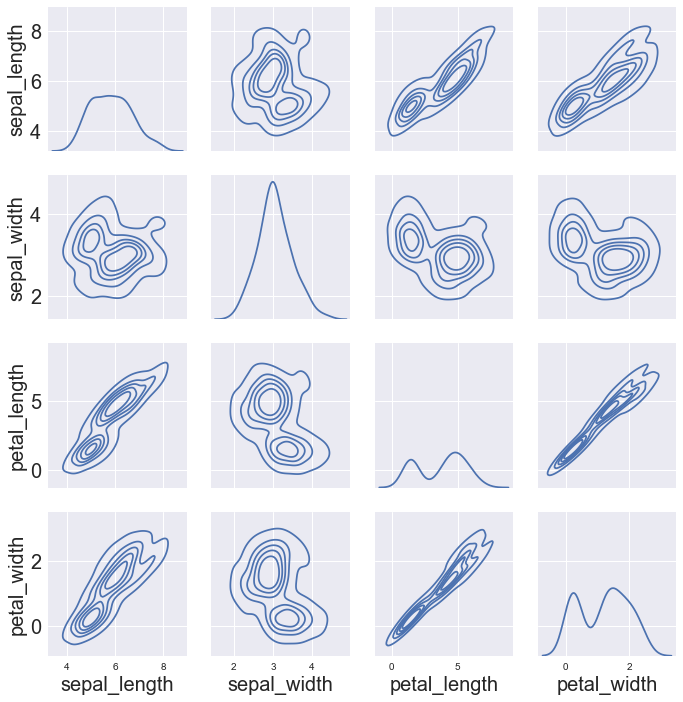

In [85]:
g=sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

In [87]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [88]:
import numpy as np


fish_data= np.column_stack((fish_length, fish_weight))
fish_target= np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

Text(0, 0.5, 'weight')

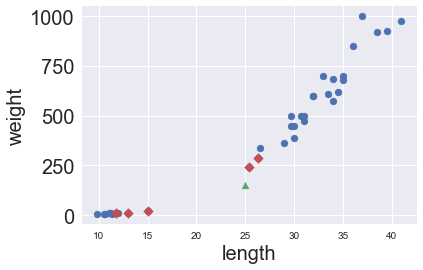

In [89]:
distances, indexes = kn.kneighbors([[25,150]])

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

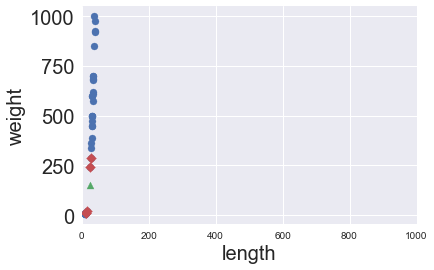

In [92]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [96]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [97]:
train_scaled=(train_input-mean)/std

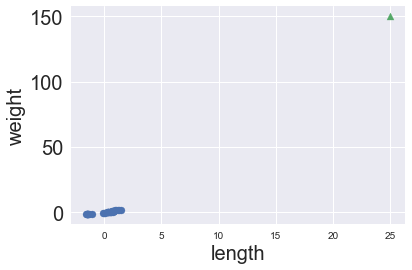

In [98]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

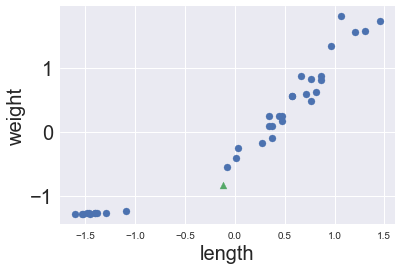

In [99]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()